# Linear Regression by Study Mart - Rashedul Alam

## Normal Visualization

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn

In [6]:
file_path = r"C:\Users\88017\Documents\mysql_dbs\new_jupyter\csv_files\nasdaq100.csv"

df = pd.read_csv(file_path, sep=";") 
df.head() 

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


Check is there any null value? if has, then how many in which column?

In [9]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [11]:
# drop date as we don't need it anymore 
df = df.drop(columns=['Date']) 

In [13]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


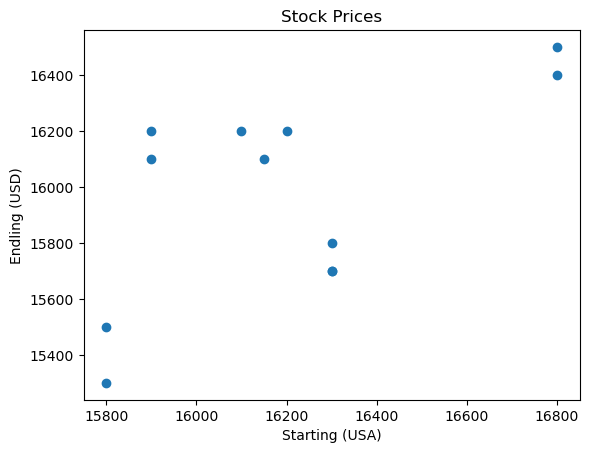

In [15]:
plt.scatter(df['Starting (USD)'],df['Ending (USD)']) 
plt.xlabel('Starting (USA)') 
plt.ylabel('Endling (USD)')
plt.title('Stock Prices')
plt.show()


## Linear Regression Apply 

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression() # define "Object" 

In [22]:
x = df[['Starting (USD)']]
x

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300
5,16800
6,15900
7,15800
8,16150
9,16300


In [24]:
y = df[['Ending (USD)']]
y

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700
5,16400
6,16200
7,15500
8,16100
9,15800


In [26]:
print(x.mean(),"-",y.mean())

Starting (USD)    16195.833333
dtype: float64 - Ending (USD)    15975.0
dtype: float64


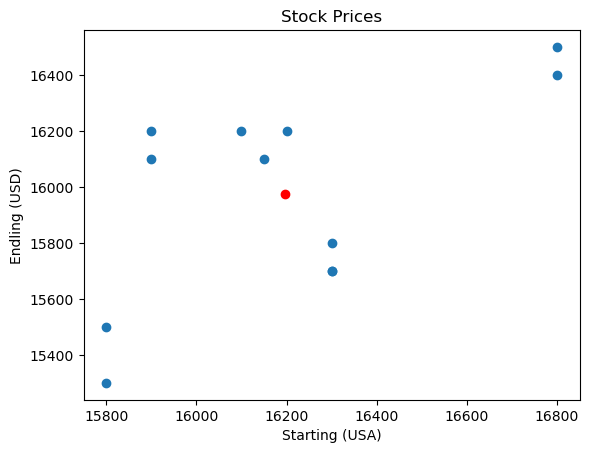

In [30]:
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)']) 
plt.xlabel('Starting (USA)') 
plt.ylabel('Endling (USD)')
plt.title('Stock Prices')
plt.show()

### Train the Model

In [33]:
### Fit the model 

In [35]:
reg.fit(x,y) # train the model # everything are now fit in this ML model -> cofficient (gradiant), intercept -> 'm', 'c'

LinearRegression()

In [37]:
m = reg.coef_

m

array([[0.65258293]])

In [39]:
c = reg.intercept_

c

array([5405.87555702])

In [41]:
# y = mx + c

### Task: What will be the predicted "Ending USD" if once a day the Starting USD = 16700

In [44]:
yy = m*16700 + c
yy

array([[16304.0105628]])

In [46]:
# another way to preditct he result of "Ending USD" 
reg.predict([[16700]]) # answer: array([[16304.0105628]])

C:\Users\88017\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

### Lets create a column in the dataframe and draw with the predicted price to a new scatter plot

In [49]:
df['Predicted_Ending_USD']=reg.predict(x)
df

,Starting (USD),Ending (USD),Predicted_Ending_USD
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


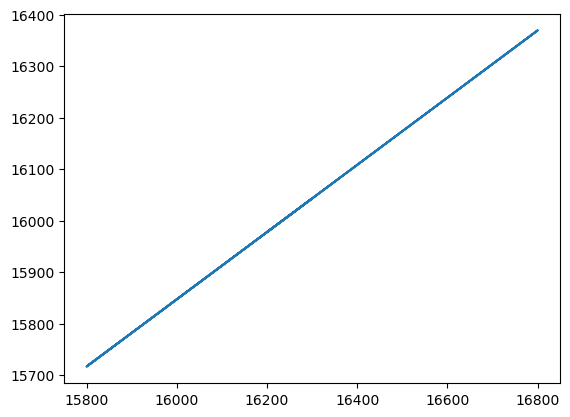

In [51]:
plt.plot(x, reg.predict(x))

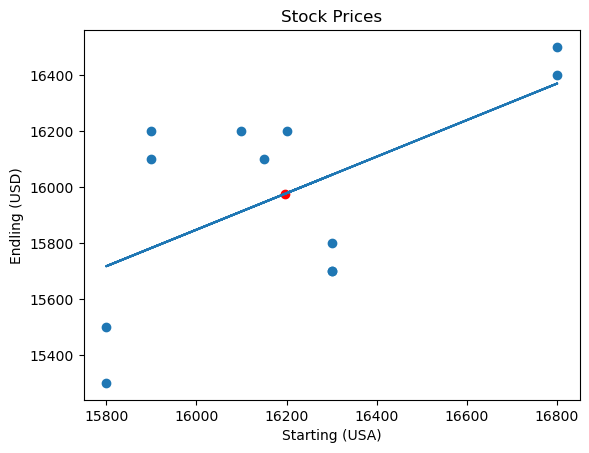

In [53]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)']) 
plt.xlabel('Starting (USA)') 
plt.ylabel('Endling (USD)')
plt.title('Stock Prices')
plt.show()

## lost and cost function in linear regression 

Recidual = lost and cost

In [70]:
df['lost'] = df['Ending (USD)'] - df['Predicted_Ending_USD']
df['lost']

0     130.731144
1     318.055785
2    -416.685922
3     287.539198
4    -342.977389
5      30.731144
6     418.055785
7    -216.685922
8     154.910051
9    -242.977389
10    222.280904
11   -342.977389
Name: lost, dtype: float64

In [76]:
df.head()

,Starting (USD),Ending (USD),Predicted_Ending_USD,lost
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [78]:
df.head()

,Starting (USD),Ending (USD),Predicted_Ending_USD,lost
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [80]:
# MSE and MAE 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [82]:
mse = mean_squared_error(df['Ending (USD)'],df['Predicted_Ending_USD']) 
mse 

80411.23397700385

In [86]:
mae = mean_absolute_error(df['Ending (USD)'], df['Predicted_Ending_USD'])
mae

260.3840017604666

In [94]:
# mae : another way to calculate "MAE" manually.
sum(abs(df['lost']))/len(x)

260.3840017604666

In [98]:
reg.score(x,y)

0.3577804940272571

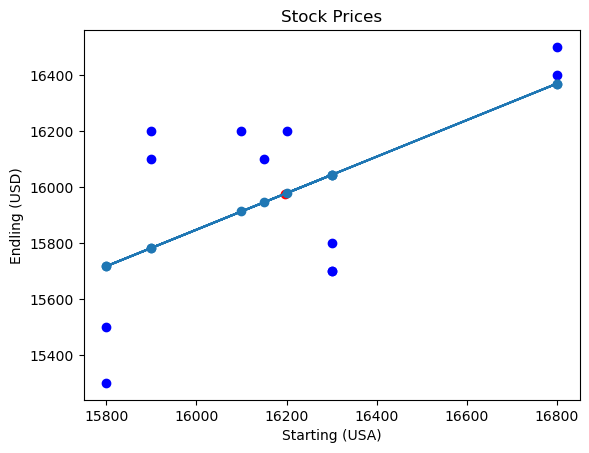

In [132]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'], color='blue') 
plt.scatter(df['Starting (USD)'], reg.predict(x), )
plt.xlabel('Starting (USA)') 
plt.ylabel('Endling (USD)')
plt.title('Stock Prices')
plt.show()


## R2 Squared Value / Model Accurary


**cofficient of ditermination** 

In [136]:
from sklearn.metrics import r2_score

Ways:\
A)
$$
    reg.score(xtest, ytest) 
$$
B)

$$
y-pred = reg.predict(xtest).
$$
$$
score = r2-score(ytest, y-pred) 
$$

In [159]:
reg.score(x,y)

0.3577804940272571

In [161]:
r2_score(y,reg.predict(x))

0.3577804940272571

In [165]:
##